<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/Assignment_1_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preliminaries and Data

In this exercise, we'll be revisiting our State of the Union speech data, corresponding to 23,469 paragraph-level speech documents. These speeches were made during the period 1790-01-08 to 2014-01-28 (Washington through Obama).

The data for this exercise (available as a csv file named Exercise_1.csv) and include the following variables:

Paragraph is paragraph number for an individual president's State of the Union speech,
Date is the date, down to the calendar day,
President is the first and last name of the speech's president,
Party is the president's associated party (Republican, Democrat, Other),
text is the actual text of a corresponding speech-paragraph.
The straightforward idea is to read the data into R, and implement the following tasks, combining them into a final Word or PDF write-up:

Exercise

1.Create an individual word cloud for Barack Obama's State of the Union speeches, coloring it as you'd like. Include this world cloud in your write up, describing the sample used to create this word cloud and any preprocessing steps you used. Then give a brief summary of your findings: what patterns do you notice in your Barack Obama word cloud? 

2. Create a new comparison word cloud for (i) Barack Obama's State of the Union speeches and (ii) George W. Bush's State of the Union speeches. Color Obama's portion of the word cloud in blue and color Bush's portion of the word cloud as red. Include this world cloud in your write up, describing the sample used to create this word cloud and any preprocessing steps you used. Then give a brief summary of your findings: what patterns do you notice in your comparisons of Obama's and Bush's portions of the word cloud? 

# **Reading in and preparing data**

In [68]:
# loading in core data science libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [69]:
# reading in the data 
fname = "/content/drive/MyDrive/Delaware/Spring 2023/Text Analysis /Week1 Assignment 1/Lab 1/sotu_per_paragraph.csv"
speech = pd.read_csv(fname)

In [70]:
speech

,paragraph,date,President,Party,text
0,1,1790-01-08,George Washington,Other,I embrace with great satisfaction the opportun...
1,2,1790-01-08,George Washington,Other,In resuming your consultations for the general...
2,3,1790-01-08,George Washington,Other,Among the many interesting objects which will ...
3,4,1790-01-08,George Washington,Other,"A free people ought not only to be armed, but ..."
4,5,1790-01-08,George Washington,Other,The proper establishment of the troops which m...
...,...,...,...,...,...
23464,79,2014-01-28,Barack Obama,Democrats,"As this time of war draws to a close, a new ge..."
23465,80,2014-01-28,Barack Obama,Democrats,Let me tell you about one of those families I'...
23466,81,2014-01-28,Barack Obama,Democrats,"A few months later, on his 10th deployment, Co..."
23467,82,2014-01-28,Barack Obama,Democrats,"My fellow Americans, men and women like Cory r..."


In [71]:
# boolean indexing to only get OBama SOU speech data 
obama = speech['President'] == 'Barack Obama'
speech_obama = speech[obama]
speech_obama

# extracting only the text of SOU speeches from Obama for the word cloud and pre-processing
obama_text = speech_obama['text']

In [72]:
# boolean indexing to only get Bush SOU speech data 
bush = speech['President'] == 'George W. Bush' 
speech_bush = speech[bush]
speech_bush

# extracting only the text of SOU speeches from Bush for the word cloud and pre-processing 
bush_text = speech_bush['text']

## **Obama text pre-processing**

In [73]:
#removing numbers
def remove_num(obama_text):
    obama_text = ''.join([i for i in obama_text if not i.isdigit()])
    return obama_text

#executing function
obama_text = np.vectorize(remove_num)(obama_text)


#removing punctuation
from string import punctuation
def remove_punct(obama_text):
    text = ' '.join(word.strip(punctuation) for word in obama_text.split() if word.strip(punctuation))
    return obama_text

#executing function
obama_text = np.vectorize(remove_punct)(obama_text)



#removing other characters
def remove_u(obama_text):
    obama_text = obama_text.replace('_','')
    obama_text = obama_text.replace('?','')
    obama_text = obama_text.replace('•','')
    obama_text = obama_text.replace("@",'')
    obama_text = obama_text.replace('▯','')
    obama_text = obama_text.replace("'",'')
    obama_text = obama_text.replace(",","")
    return obama_text

#executing function
obama_text = np.vectorize(remove_u)(obama_text)


#removing extra spaces
def remove_extra_space(obama_text):
    word_list = obama_text.split()
    obama_text = ' '.join(word_list)
    return obama_text

#executing function
obama_text = np.vectorize(remove_extra_space)(obama_text)



#removing very common words
#reference: https://gist.github.com/sebleier/554280
stop_words = ["i", "I", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
def remove_stopwords(obama_text):
    word_list = obama_text.split()
    word_list = [word for word in word_list if word not in stop_words]
    obama_text = ' '.join(word_list)
    return obama_text

#executing function
obama_text = np.vectorize(remove_stopwords)(obama_text)
obama_text = obama_text.tolist()
print(obama_text)


['Now honest well admit long always met responsibilities Government people. say lay blame look backwards understanding arrived moment well able lift predicament.', 'Still plan require significant resources Federal Government--and yes probably weve already set aside. But cost action great assure cost inaction far greater could result economy sputters along months years perhaps decade. That would worse deficit worse business worse worse next generation. And refuse let happen.', 'My budget attempt solve every problem address every issue. It reflects stark reality weve inherited trillion-dollar deficit financial crisis costly recession. Given realities everyone Chamber Democrats Republicans sacrifice worthy priorities dollars. And includes me. But mean afford ignore long-term challenges. reject view says problems simply take care says Government role laying foundation common prosperity.', 'We soon lay thousands miles power lines carry new energy cities towns across country. And put America

## **Bush Text Pre-Processing**

In [74]:
##removing numbers
def remove_num(bush_text):
    bush_text = ''.join([i for i in bush_text if not i.isdigit()])
    return bush_text

#executing function
bush_text = np.vectorize(remove_num)(bush_text)


#removing punctuation
from string import punctuation
def remove_punct(bush_text):
    text = ' '.join(word.strip(punctuation) for word in bush_text.split() if word.strip(punctuation))
    return bush_text

#executing function
bush_text = np.vectorize(remove_punct)(bush_text)



#removing other characters
def remove_u(bush_text):
    bush_text = bush_text.replace('_','')
    bush_text = bush_text.replace('?','')
    bush_text = bush_text.replace('•','')
    bush_text = bush_text.replace("@",'')
    bush_text = bush_text.replace('▯','')
    bush_text = bush_text.replace("'",'')
    bush_text = bush_text.replace(",","")
    return bush_text

#executing function
bush_text = np.vectorize(remove_u)(bush_text)


#removing extra spaces
def remove_extra_space(bush_text):
    word_list = bush_text.split()
    bush_text = ' '.join(word_list)
    return bush_text

#executing function
bush_text = np.vectorize(remove_extra_space)(bush_text)



#removing very common words
#reference: https://gist.github.com/sebleier/554280
stop_words = ["i", "I", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
def remove_stopwords(bush_text):
    word_list = bush_text.split()
    word_list = [word for word in word_list if word not in stop_words]
    bush_text = ' '.join(word_list)
    return bush_text

#executing function
bush_text = np.vectorize(remove_stopwords)(bush_text)
bush_text = bush_text.tolist()
#print(bush_text)


# **Word Cloud**

In [75]:
#importing packages necessary for word cloud creation 
# from os import path
#from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# lower max_font_size, change the maximum number of word and lighten the background:
#from wordcloud import ImageColorGenerator



In [76]:
# creaating string datatypes for both bush and Obama SOU text in order to produce the word cluod 
obama_text = str(obama_text)
bush_text = str(bush_text)

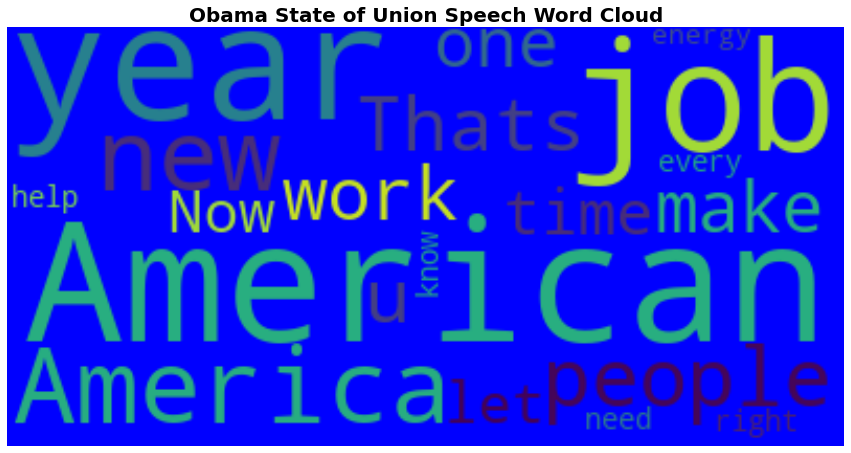

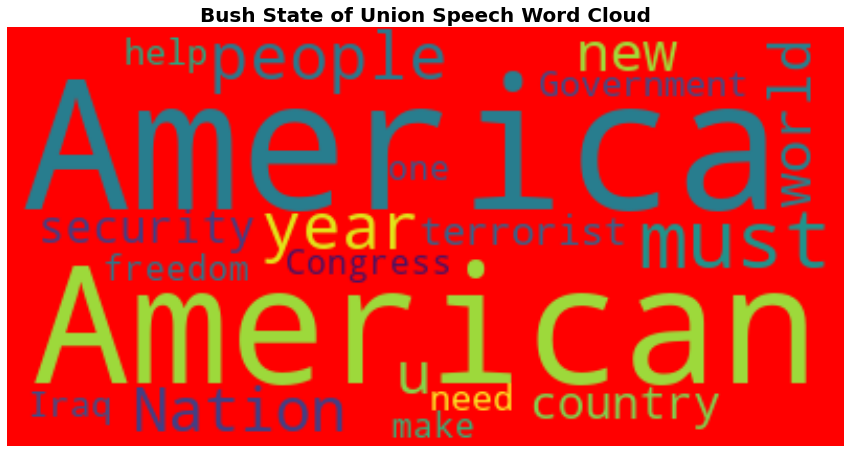

In [77]:
#creating wordcloud for Obama SOU
fig, ax = plt.subplots(figsize = (15, 10))
word_cloud = WordCloud(collocations = False, max_words=20, background_color = 'blue').generate(obama_text)
ax.imshow(word_cloud, interpolation='bilinear')
ax.axis("off")
ax.set_title('Obama State of Union Speech Word Cloud', fontsize=20, weight='bold')
fig.show()

# creating bush word cloud with top 20 words in SOU address 
fig, ax = plt.subplots(figsize = (15, 10))
word_cloud = WordCloud(collocations = False, max_words=20, background_color = 'red').generate(bush_text)
ax.imshow(word_cloud, interpolation='bilinear')
ax.axis("off")
ax.set_title('Bush State of Union Speech Word Cloud', fontsize=20, weight='bold')
fig.show()

Figure 1 above presents a word cloud of George H. Bush and Obama's State of the Union speeches throughout the years they were presidents respectively. The word cloud is presented with the top 20 most frequently words used by both President's in their SOU addresses, after extensive pre-processing of the text was carried out. THere is a clear difference, Obama's word cloud paints a more optimisitc picture with jobs, energy, new, now, which are just some of the words now offering a picture of hope. Meanwhile, Bush's word cloud connotes a sensation of danger, and that freedom is at risk and must be protected. It is much more nationalistic in nature.  